In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [59]:
spotufy_2023 = pd.read_csv("./data/spotify-2023.csv", encoding='latin1')
spotify_2024 = pd.read_csv("./data/Most Streamed Spotify Songs 2024.csv", encoding='latin1')
data_cleaned = pd.read_csv("./cleaned_data_ke.csv", encoding='latin1')

In [60]:
spotify_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

I can see that all number columns are objects, not floats or integers. In order to have right approach, they need to be converted into integers. Ive also see that 'TIDAL Popularity' column have all values as null.

In [61]:
spotify_2024.shape

(4600, 29)

In [62]:
spotify_2024.isnull().sum().sort_values(ascending=False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
All Time Rank                    0
Track Score                      0
ISRC                             0
Track                            0
Album Name                       0
Release Date                     0
Explicit Track      

In [7]:
# remove fields with too many nulls 
spotify_2024 = spotify_2024.drop(columns=['ISRC','SiriusXM Spins','Soundcloud Streams','Pandora Track Stations'])
spotify_2024.head(10)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,"150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,"156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,"373,784,955",190.0,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"3,351,188,582",394.0,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,"112,763,851",182.0,"12,185",82.0,"17,660,624",105.0,"4,493,884","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,6,410.1,"670,665,438","105,892","175,421,034",83.0,...,"2,867,222,632",138.0,"522,042",86.0,"17,167,254",152.0,"138,529,362","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,7,407.2,"900,158,751","73,118","201,585,714",86.0,...,"4,601,579,812",280.0,"383,478",168.0,"48,197,850",154.0,"65,447,476","9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,8,375.8,"675,079,153","40,094","211,236,940",92.0,...,"2,112,581,620",160.0,"17,221",87.0,"33,245,595",53.0,"3,372,428","6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,9,355.7,"1,653,018,119",1,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,10,330.6,"90,676,573","10,400","184,199,419",86.0,...,"174,706,874",191.0,"3,823",78.0,"10,800,098",92.0,"1,005,626","666,302",NaN,1


In [63]:
#The object to convert to a datetime
spotify_2024.loc[:, 'Release Date'] = pd.to_datetime(spotify_2024['Release Date'])
spotify_2024.loc[:, 'Release Year'] = pd.to_datetime(spotify_2024['Release Date']).dt.year
spotify_2024.loc[:, 'Release Month'] = pd.to_datetime(spotify_2024['Release Date']).dt.month

In [64]:
spotify_2024.loc[:, 'Release Year'] = spotify_2024['Release Year'].astype(str)
spotify_2024.loc[:, 'Release Month'] = spotify_2024['Release Month'].astype(str)

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\3034867038.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2024' '2024' '2024' ... '2020' '2016' '2017']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  spotify_2024.loc[:, 'Release Year'] = spotify_2024['Release Year'].astype(str)
C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\3034867038.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '3' ... '2' '11' '4']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  spotify_2024.loc[:, 'Release Month'] = spotify_2024['Release Month'].astype(str)


In [65]:
spotify_2024.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26 00:00:00,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19 00:00:00,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12 00:00:00,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2023,1
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,2024,5


In [66]:
spotify_2024.columns.to_list()

['Track',
 'Album Name',
 'Artist',
 'Release Date',
 'ISRC',
 'All Time Rank',
 'Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'SiriusXM Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Pandora Track Stations',
 'Soundcloud Streams',
 'Shazam Counts',
 'TIDAL Popularity',
 'Explicit Track',
 'Release Year',
 'Release Month']

In [67]:
#this fields ill keep for analysis
spotify_fields_keep = spotify_2024[['Album Name','Track','Artist','Release Date',
                                     'Release Month','Release Year',
                                      'All Time Rank','Track Score','Spotify Streams',
                                      'Spotify Popularity',
                                      'YouTube Views', 'YouTube Likes', 'TikTok Likes','TikTok Views',
                                      'Explicit Track',]]                  

In [69]:
spotify_fields_keep.loc[:, 'Month-year'] = spotify_fields_keep[['Release Month','Release Year']].agg('-'.join,axis=1)

spotify_fields_keep.head()

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Track Score,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Likes,TikTok Views,Explicit Track,Month-year
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26 00:00:00,4,2024,1,725.4,"390,470,936",92.0,"84,274,754","1,713,126","651,565,900","5,332,281,936",0,4-2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,5,2024,2,545.9,"323,703,884",92.0,"116,347,040","3,486,739","35,223,547","208,339,025",1,5-2024
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19 00:00:00,3,2024,3,538.4,"601,309,283",92.0,"122,599,116","2,228,730","275,154,237","3,369,120,610",0,3-2024
3,Flowers - Single,Flowers,Miley Cyrus,2023-01-12 00:00:00,1,2023,4,444.9,"2,031,280,633",85.0,"1,096,100,899","10,629,796","1,078,757,968","14,603,725,994",0,1-2023
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,5,2024,5,423.3,"107,034,922",88.0,"77,373,957","3,670,188",NaN,NaN,1,5-2024


In [70]:
spotify_fields_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Album Name          4600 non-null   object 
 1   Track               4600 non-null   object 
 2   Artist              4595 non-null   object 
 3   Release Date        4600 non-null   object 
 4   Release Month       4600 non-null   object 
 5   Release Year        4600 non-null   object 
 6   All Time Rank       4600 non-null   object 
 7   Track Score         4600 non-null   float64
 8   Spotify Streams     4487 non-null   object 
 9   Spotify Popularity  3796 non-null   float64
 10  YouTube Views       4292 non-null   object 
 11  YouTube Likes       4285 non-null   object 
 12  TikTok Likes        3620 non-null   object 
 13  TikTok Views        3619 non-null   object 
 14  Explicit Track      4600 non-null   int64  
 15  Month-year          4600 non-null   object 
dtypes: flo

In [71]:
# fill null values to zero 
spotify_fields_keep = spotify_fields_keep.fillna(0)

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\616930080.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_fields_keep = spotify_fields_keep.fillna(0)


In [72]:
numeric_columns = ['All Time Rank',
                   'Track Score',
                   'Spotify Streams',
                   'Spotify Popularity',
                   'YouTube Views',
                   'YouTube Likes',
                   'TikTok Likes',
                   'TikTok Views']



for num in numeric_columns:
    try:
        spotify_fields_keep[num] = spotify_fields_keep[num].astype(str).str.replace(',', '').astype(int)
    except:
        spotify_fields_keep[num] = spotify_fields_keep[num].astype(int)

In [73]:
#dates are in US format
spotify_2024['Release Date'].unique()

array([Timestamp('2024-04-26 00:00:00'), Timestamp('2024-05-04 00:00:00'),
       Timestamp('2024-03-19 00:00:00'), ...,
       Timestamp('2018-10-31 00:00:00'), Timestamp('2016-11-08 00:00:00'),
       Timestamp('2017-04-11 00:00:00')], dtype=object)

In [74]:

# Convert the 'Date' column to datetime format (American MM/DD/YYYY)
spotify_2024['Release Date'] = pd.to_datetime(spotify_2024['Release Date'], format='%m/%d/%Y')

# Convert to European format (DD/MM/YYYY)
spotify_2024['Release Date'] = spotify_2024['Release Date'].dt.strftime('%d/%m/%Y')

# Display the result
print(spotify_2024)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date          ISRC All Time Rank  Track Score  \
0      Tommy Richman 

In [75]:
spotify_2024 = spotify_2024.drop_duplicates()
spotify_2024.shape

(4598, 31)

In [77]:
#Change the funny characters name into readible format
spotify_2024['Artist'].replace({
    'Arcï¿½ï¿½': 'Arcangel',
    'Bad Bï¿½nny': 'Bad Bunny'
}, inplace=True)

In [78]:
# Check NaN values in each column.
for column in spotify_2024.columns:
    print(column, spotify_2024[column].isnull().sum())

Track 0
Album Name 0
Artist 5
Release Date 0
ISRC 0
All Time Rank 0
Track Score 0
Spotify Streams 113
Spotify Playlist Count 70
Spotify Playlist Reach 72
Spotify Popularity 804
YouTube Views 308
YouTube Likes 315
TikTok Posts 1173
TikTok Likes 980
TikTok Views 981
YouTube Playlist Reach 1009
Apple Music Playlist Count 561
AirPlay Spins 498
SiriusXM Spins 2123
Deezer Playlist Count 921
Deezer Playlist Reach 928
Amazon Playlist Count 1055
Pandora Streams 1106
Pandora Track Stations 1268
Soundcloud Streams 3332
Shazam Counts 577
TIDAL Popularity 4598
Explicit Track 0
Release Year 0
Release Month 0


In [79]:
# Drop a row if ALL columns in a row are NaN
spotify_2024.dropna(how="all")

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,26/04/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,04/05/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,19/03/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,12/01/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2023,1
4,Houdini,Houdini,Eminem,31/05/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,2024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,05/09/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,2017,9
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,27/07/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,927,NaN,NaN,NaN,NaN,"193,590",NaN,0,2018,7
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,28/02/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2020,2
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,08/11/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,2016,11


In [80]:
spotify_2024.drop_duplicates()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,26/04/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,04/05/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,19/03/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,12/01/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2023,1
4,Houdini,Houdini,Eminem,31/05/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,2024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,05/09/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,2017,9
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,27/07/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,927,NaN,NaN,NaN,NaN,"193,590",NaN,0,2018,7
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,28/02/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2020,2
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,08/11/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,2016,11


In [81]:
#1. To check if data was correctly cleaned:
#check head and tails to make sure that the data is correct
#sample method-> check random samples of the dataset to check if there are problems:
#methods:
#data.sample(n=XXX) --> n can be equal to the size you want
#data.sample(frac=0.1) --> fraction of original data frame
#run it 5 times to check that your data is correctly cleaned

spotify_2024.sample(n=10)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
1627,Fotos Y Recuerdos (Remasterizado 2024/30th Ann...,Amor Prohibido (Remasterizado 2024/30th Annive...,Selena,22/03/2024,USUM72402908,"1,622",36.4,"66,283,950",13,"74,994",...,NaN,1.0,"59,665,654","10,946",NaN,NaN,NaN,0,2024,3
1039,FE!N (feat. Playboi Carti),FE!N (feat. Playboi Carti),Travis Scott,30/03/2024,USSM22301824,"1,033",47.2,"656,618,110",3,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2024,3
2419,Una Lady Como Tï¿,Una Lady Como Tï¿,Manuel Turizo,01/12/2016,QZ5AB1708080,"2,409",29.0,"2,935,372",41,"3,790",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2016,12
3096,ýýýýýýýýýýýýýý,ýýýýýýýýýýýýýý - Single,Wallem,12/03/2024,RUAGV2401381,"3,081",24.9,"3,636,983",776,"267,020",...,NaN,NaN,NaN,NaN,NaN,"600,644",NaN,0,2024,3
931,Nosso Quadro,AgroPlay Verï¿½ï¿½o V,AgroPlay,02/02/2023,BCA6L2300010,926,50.1,"423,018,422","23,872","16,779,061",...,"6,708,107",12.0,NaN,NaN,NaN,"609,133",NaN,0,2023,2
1750,Trip,Trip,Ella Mai,03/08/2018,USUM71810720,"1,747",34.9,"502,147,027","69,350","20,445,990",...,"153,682",22.0,"318,057,593","144,672",NaN,"3,345,381",NaN,0,2018,8
2242,1000 Blunts,"Sing Me a Lullaby, My Sweet Temptation",$uicideboy$,29/07/2022,QZAPK2000271,"2,237",30.3,"189,588,270","43,837","2,663,499",...,NaN,NaN,"6,559,431","3,552","14,217,001","240,381",NaN,1,2022,7
1106,Abejita Chiquitita,Las Canciones de Plim Plim Vol. 8,El Payaso Plim Plim,08/09/2023,ARLIB2220027,"1,102",45.6,"5,741,262",275,"33,239",...,"16,453",1.0,NaN,NaN,NaN,"6,795",NaN,0,2023,9
2156,Think U The Shit (Fart),Think U The Shit (Fart),Ice Spice,26/01/2024,USUG12400704,"2,155",31.0,"82,013,588","8,321","17,390,936",...,"470,265",21.0,"3,075,586","5,575",NaN,"504,447",NaN,1,2024,1
209,Columbia,Columbia,Quevedo,07/07/2023,BK4DA2310533,209,105.5,"721,002,940","84,161","56,226,278",...,"1,537,049",64.0,"260,176","1,269","120,842","1,148,958",NaN,0,2023,7


In [82]:
spotify_2024.sample(frac=0.1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
2177,Vem Desestressar,Vem Desestressar,MC PH,04/04/2024,BXG6R2400152,"2,177",30.8,"35,473,387","3,432","20,567,305",...,"12,589,266",16.0,34,NaN,NaN,"38,259",NaN,1,2024,4
1603,Life Goes On,BE,BTS,20/11/2020,QMBZ92051791,"1,594",36.7,"717,715,448","43,805","25,129,169",...,"324,211",12.0,"2,059,991","7,952",NaN,"1,991,071",NaN,0,2020,11
2986,La Jeepeta,La Jeepeta,Nio Garcia,02/01/2020,QMFMF1907946,"2,958",25.6,"80,772,450","17,494","2,936,226",...,208,31.0,"6,217,592","8,328",NaN,"237,885",NaN,1,2020,1
1151,Faz um Vuk Vuk (Teto Espelhado),Faz um Vuk Vuk (Teto Espelhado),MC Kevin o Chris,20/07/2023,BX5EU2300034,"1,145",44.4,"222,879,686","26,854","23,489,333",...,"3,017,351",19.0,"2,970",8,NaN,"130,095",NaN,1,2023,7
2393,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,29/03/2019,USUM71900773,"2,390",29.2,"930,343,185","116,055","42,732,119",...,"606,884",26.0,"38,736,042","167,546","3,706,611","2,035,027",NaN,0,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Rungkad,Rungkad,Happy Asmara,20/10/2022,SGB502268229,"3,094",24.8,"43,407,503","1,590","541,311",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022,10
1907,Beat Of Your Heart,Beat Of Your Heart - Single,Purple Disco Machine,26/01/2024,DEE862301861,"1,902",33.3,"21,179,750","3,144","19,059,841",...,"7,355,939",38.0,"8,608",10,NaN,NaN,NaN,0,2024,1
1087,Bartolito,20 GRANDES ï¿½ï¿½X,Duo Tiempo de Sol,05/10/2015,ARF061500454,"1,082",46.0,"70,061,366","6,847","1,133,511",...,"3,695",NaN,NaN,NaN,"17,519","73,794",NaN,0,2015,10
2743,Skate,Skate,Bruno Mars,30/07/2021,USAT22104222,"2,733",26.9,"248,947,222","70,726","16,159,530",...,"781,953",36.0,"15,760,107","7,726",NaN,"1,701,042",NaN,0,2021,7


2.Missing data:
delete if there is no artist, no matter if you have the name of the song. do not replace it manually
do not change special characters, leave it as it is
every change that is done manually, is not worth it.


3. How to know if the variables selected are correct, and not just make it look like a random selection:
you can use a correlation matrix with variables with numbers, be careful bc if numbers mean a categorical answer, then it is going to be a mess up
Use pearson correlation to spotify streams, youtube like, tiktok likes
Use pearson rank correlation and compare spotify streams with all time rank
all time rank vs youtube likes, and all time rank with tiktok likes (3 pearson rank correlations per separate)
this is only recommendedif the data has a normal distribution, in case not, it might fail.

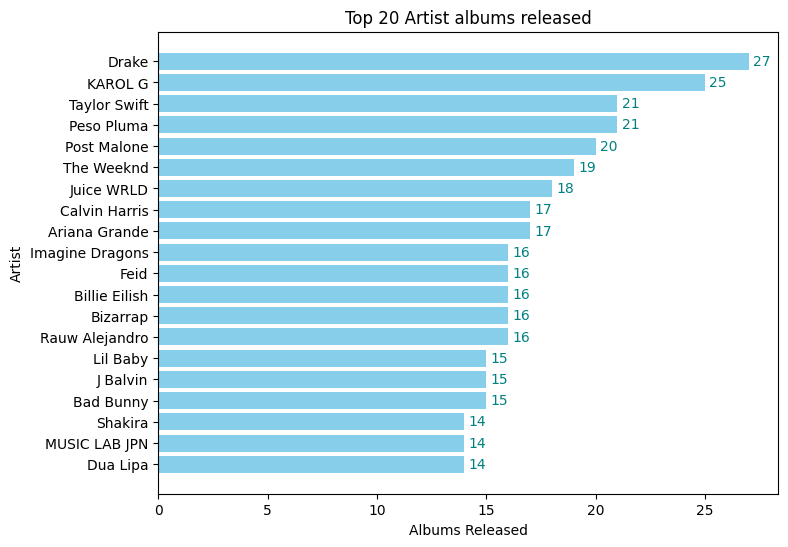

In [83]:
# initial insight on top x albums 
top_x_artists = (spotify_fields_keep.groupby('Artist')['Album Name'].nunique()
                       .reset_index(name='Album Count')
                       .sort_values(by='Album Count',ascending=False)
                       .reset_index(drop=True)).head(20)

plt.figure(figsize=(8,6))
plt.title('Top 20 Artist albums released')

bars = plt.barh(top_x_artists['Artist'],top_x_artists['Album Count'],color='skyblue')

 
for bar, percent in zip(bars, top_x_artists['Album Count']):
    plt.text( + bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2 , f'{percent}' , color = 'teal',
             va='center', ha='left')


plt.gca().invert_yaxis()
plt.ylabel('Artist')
plt.xlabel('Albums Released')
plt.show()

In [84]:
# limit to a number of artists 
high_album_count_df = spotify_fields_keep[spotify_fields_keep['Artist'].isin(['Drake','KAROL G',
                                                             'Taylor Swift','Peso Pluma',
                                                             'Post Malone','The Weeknd',
                                                             'Juice WRLD','Ariana Grande'])]

In [85]:
def individual_artist_overview(data_df, artist:str):
    """"
    Return individual artists 
    """
    artist_info = data_df[data_df['Artist']==artist][['Release Date',
                                                      'Album Name',
                                                      'Track',
                                                      'All Time Rank',
                                                      'Spotify Streams',
                                                      'Explicit Track']]

    return artist_info

print('function to return information for ' + str(high_album_count_df['Artist'].unique().tolist()))

function to return information for ['Post Malone', 'Taylor Swift', 'Ariana Grande', 'The Weeknd', 'KAROL G', 'Peso Pluma', 'Juice WRLD', 'Drake']


In [86]:
def percentage_explicit(artist_df):
    """
    Returns a percentage view of explicit tracks in the artist's DataFrame.
    """
    # Calculate percentage view
    percentage_view = artist_df['Explicit Track'].value_counts(normalize=True) * 100
    percentage_view = round(percentage_view)  # Round to the nearest whole number
    
    # Convert to df
    percentage_view = percentage_view.reset_index()
    percentage_view.columns = ['Explicit Track', 'Explicit (%)']  # Rename columns
    
    # Filter for explicit tracks (Explicit Track == 1)
    percentage_view = percentage_view[percentage_view['Explicit Track'] == 1]
    
    # Reset the index
    percentage_view = percentage_view.reset_index(drop=True)

    return percentage_view


def artist_total_streams(artist_df, artist: str):
    """
    Returns the total Spotify streams for a specific artist as a pandas DataFrame.
    """

    artist_df_filtered = artist_df[artist_df['Artist'].str.lower() == artist.lower()]
    
    # Sum the streams
    artist_df_sum = artist_df_filtered['Spotify Streams'].sum()
    
    # Prepare the DataFrame for return
    artist_view = pd.DataFrame({'Artist': [artist], 'Total Spotify Streams': [artist_df_sum]})

    return artist_view


In [87]:
df_list = []
artist_list = high_album_count_df['Artist'].unique().tolist()

for arty in artist_list:
    artist_streams = artist_total_streams(high_album_count_df,artist=arty)
    artist_explicit = percentage_explicit(high_album_count_df[high_album_count_df['Artist']==arty])
    joined_table = artist_streams.join(artist_explicit)

    df_list.append(joined_table)

In [88]:
top_level_artist = pd.concat(df_list)
top_level_artist = top_level_artist.set_index('Artist')
top_level_artist = top_level_artist.sort_values('Total Spotify Streams',ascending=True)

In [89]:
top_level_artist.corr()

,Total Spotify Streams,Explicit Track,Explicit (%)
Total Spotify Streams,1.000000,NaN,-0.405944
Explicit Track,NaN,NaN,NaN
Explicit (%),-0.405944,NaN,1.000000


In [90]:
print(top_level_artist.sort_values(by='Total Spotify Streams',ascending=False))
print('')
print('From here we can see that the Weeknd is the most streamed artist')

               Total Spotify Streams  Explicit Track  Explicit (%)
Artist                                                            
The Weeknd               36948540278               1          52.0
Drake                    34962157577               1          86.0
Taylor Swift             34470771165               1          21.0
Post Malone              26137472958               1          73.0
Ariana Grande            23464991696               1          46.0
Juice WRLD               14230348723               1         100.0
KAROL G                  13763899676               1          44.0
Peso Pluma                6150121558               1          86.0

From here we can see that the Weeknd is the most streamed artist


In [91]:
# helper functions to automate some analysis

def top_streamed_songs(music_df,platform:str):
    """
    Top streamed songs per platform
    """
    top_platofrm = music_df[['Artist','Track',platform,'Explicit Track','All Time Rank']].sort_values(by=platform,ascending=False)
    top_10_platform = top_platofrm.head(10)
    top_10_platform = top_10_platform.reset_index()
    top_10_platform = top_10_platform.drop(columns='index')


    return top_10_platform


def visualise_platform(dataset:pd.DataFrame):
    """returns viisualisation of top artists in bar chart form """

    # set color scheme
    unique_data = dataset['Track'].unique().tolist()
    color_pallete = sns.color_palette('husl',len(unique_data))

    unique_color_palette = dict(zip(unique_data,color_pallete))

    # visualise in matplotlib
    plt.title('Top Tracks from ' + dataset.columns[2] )

    for one in unique_data:
        if one in unique_color_palette:
            one_data = dataset[dataset['Track'] == one]
            plt.bar(one_data['Track'],one_data[dataset.columns[2]],color=unique_color_palette[one], label=one)
    
    plt.xticks(rotation=90)
    plt.ylabel(dataset.columns[2])
    return plt.show()

In [92]:
top_streamed_songs(spotify_fields_keep,platform='Spotify Streams')

,Artist,Track,Spotify Streams,Explicit Track,All Time Rank
0,The Weeknd,Blinding Lights,4281468720,0,56
1,xSyborg,Blinding Lights,4261328190,0,4229
2,Ed Sheeran,Shape of You,3909458734,0,54
3,xSyborg,Shape of You,3888356417,0,1807
4,Lewis Capaldi,Someone You Loved,3427498835,0,133
5,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3358704125,0,116
6,Harry Styles,As It Was,3301814535,0,20
7,Harry Styles,As It Was,3299082422,0,3410
8,The Weeknd,Starboy,3291262413,1,265
9,Drake,One Dance,3192204066,0,518


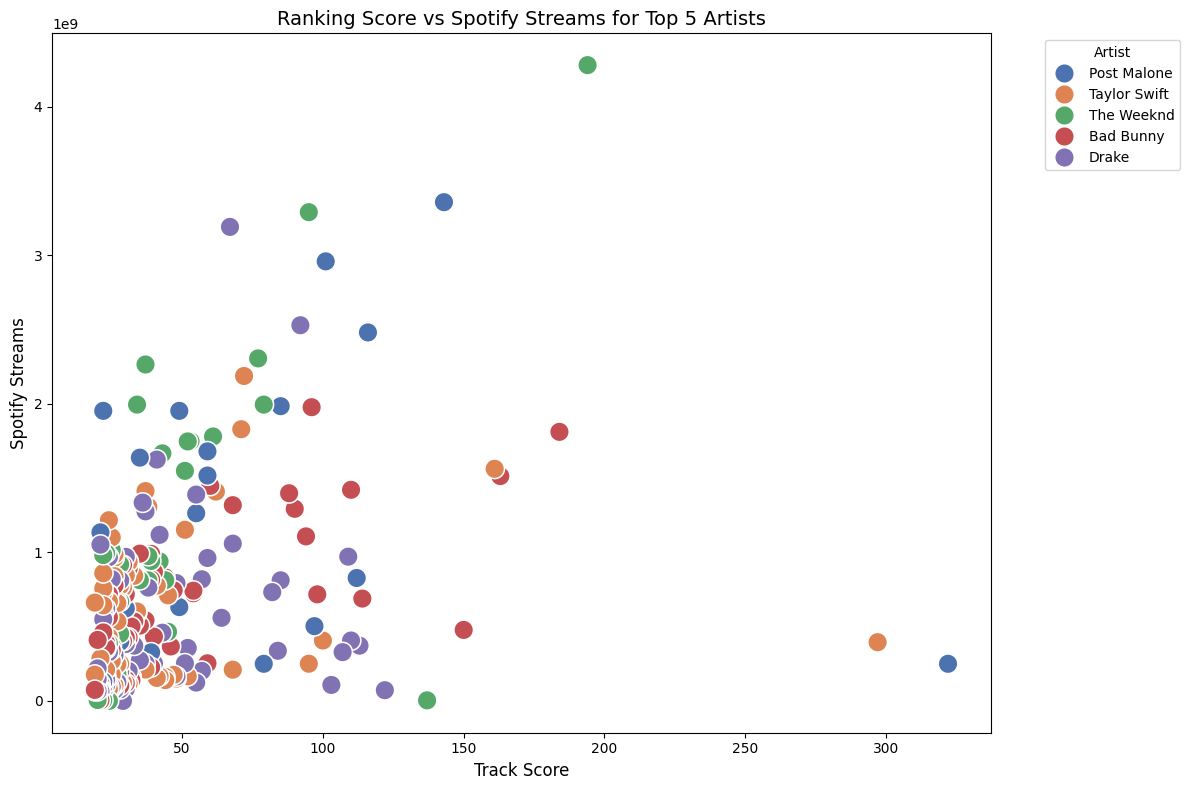

In [113]:
# Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Post Malone', 'Taylor Swift', 'The Weeknd', 'Bad Bunny', 'Drake']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist',  # Group points by Artist
    palette='deep',
    s=200  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('Ranking Score vs Spotify Streams for Top 5 Artists', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

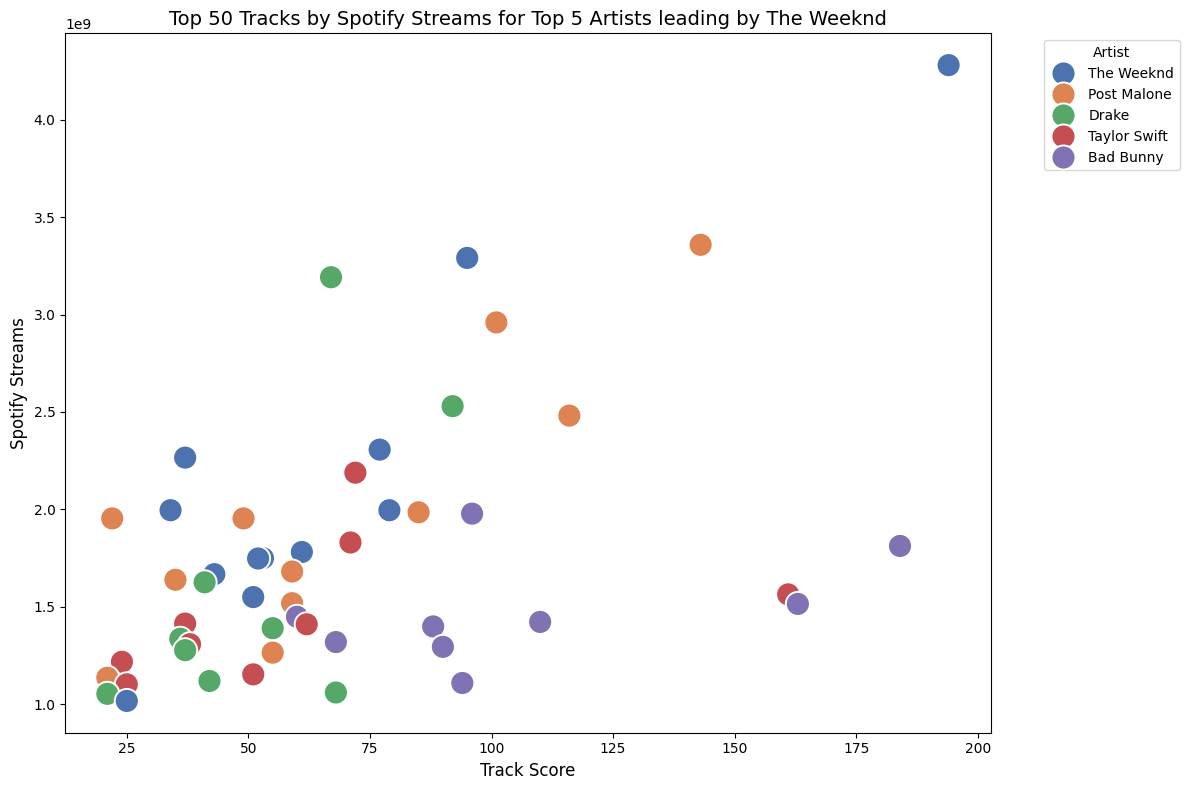

In [117]:
# Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Post Malone', 'Taylor Swift', 'The Weeknd', 'Bad Bunny', 'Drake']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 100 tracks based on Spotify Streams
df_top_100 = df_top_5.nlargest(50, 'Spotify Streams')

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_100, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist',  # Group points by Artist
    palette='deep',
    s=300  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('Top 50 Tracks by Spotify Streams for Top 5 Artists leading by The Weeknd', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\1713882923.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


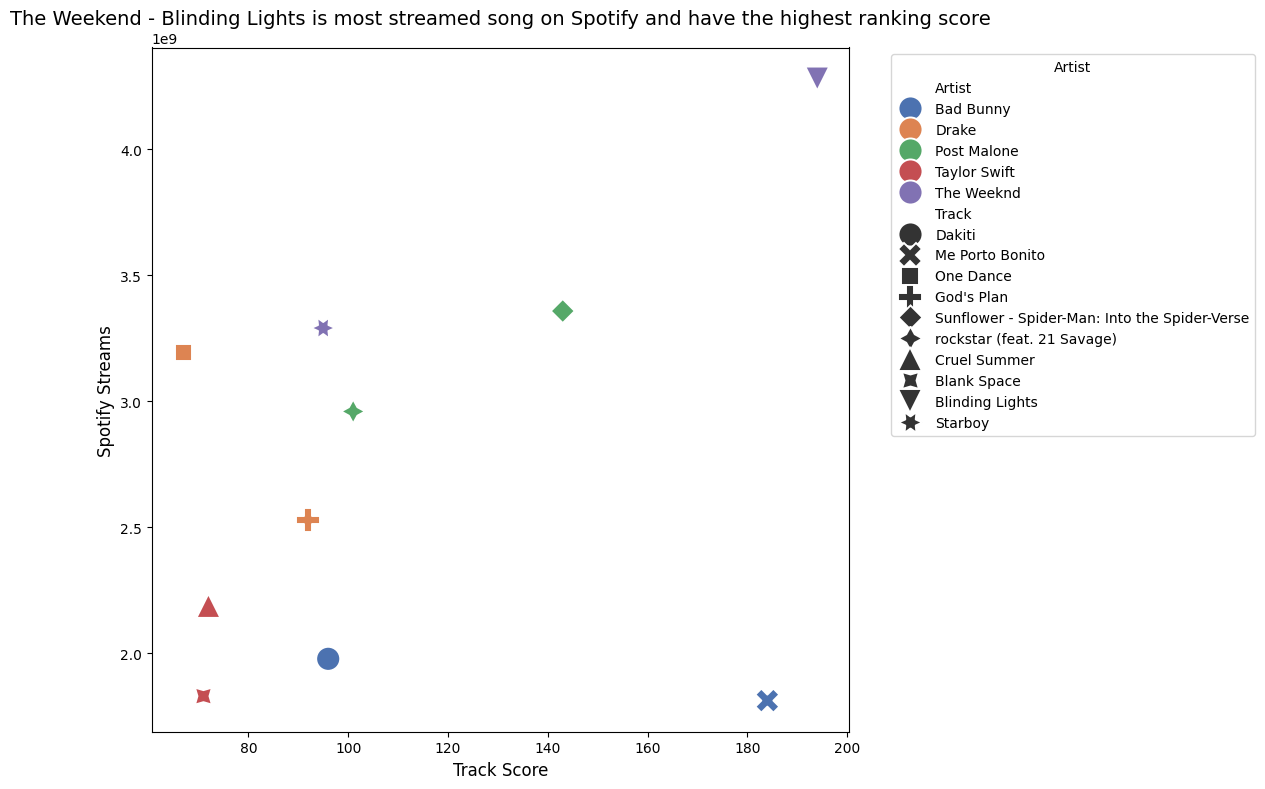

In [118]:
#Ranking Score vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Post Malone', 'Taylor Swift', 'The Weeknd', 'Bad Bunny', 'Drake']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=300  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('The Weekend - Blinding Lights is most streamed song on Spotify and have the highest ranking score', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\1457910343.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


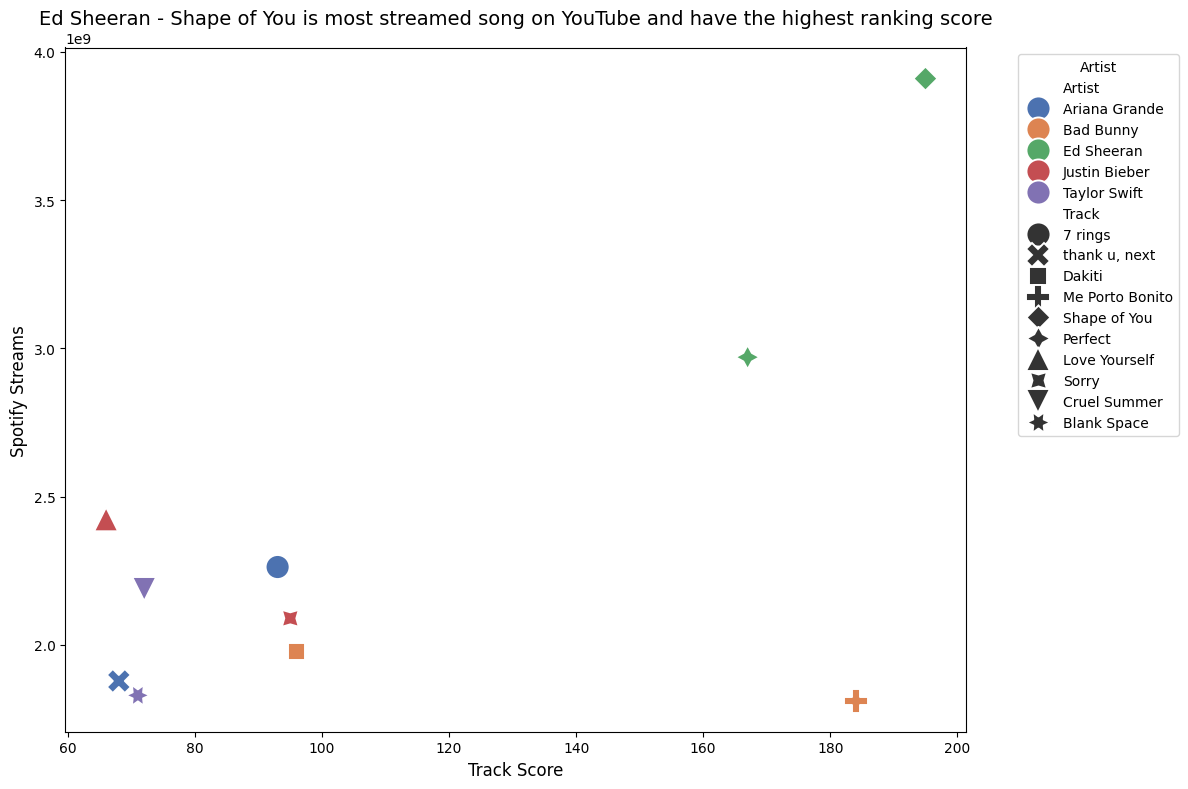

In [94]:
#Ranking Score vs Youtube Views
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Taylor Swift', 'Ariana Grande', 'Ed Sheeran', 'Bad Bunny', 'Justin Bieber']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='Track Score', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=300  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('Ed Sheeran - Shape of You is most streamed song on YouTube and have the highest ranking score', fontsize=14)
plt.xlabel('Track Score', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\1616009998.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


Text(0, 0.5, 'Spotify Streams')

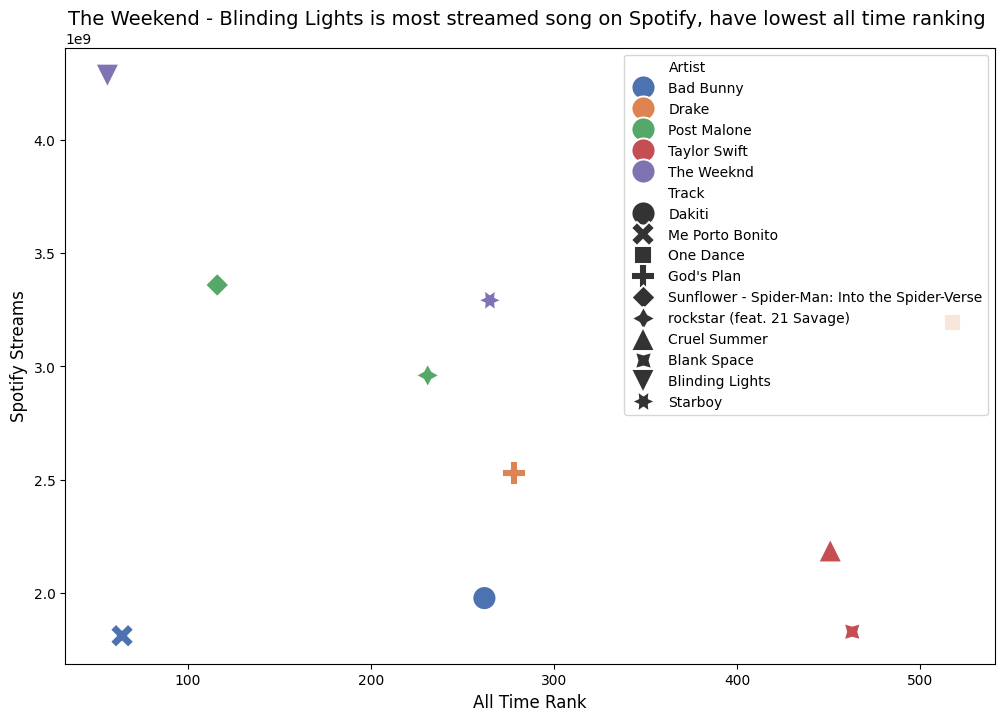

In [119]:
#All Time Rank vs Spotify Streams
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Post Malone', 'Taylor Swift', 'The Weeknd', 'Bad Bunny', 'Drake']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='All Time Rank', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=300  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('The Weekend - Blinding Lights is most streamed song on Spotify, have lowest all time ranking ', fontsize=14)
plt.xlabel('All Time Rank', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\323014956.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Spotify Streams'))


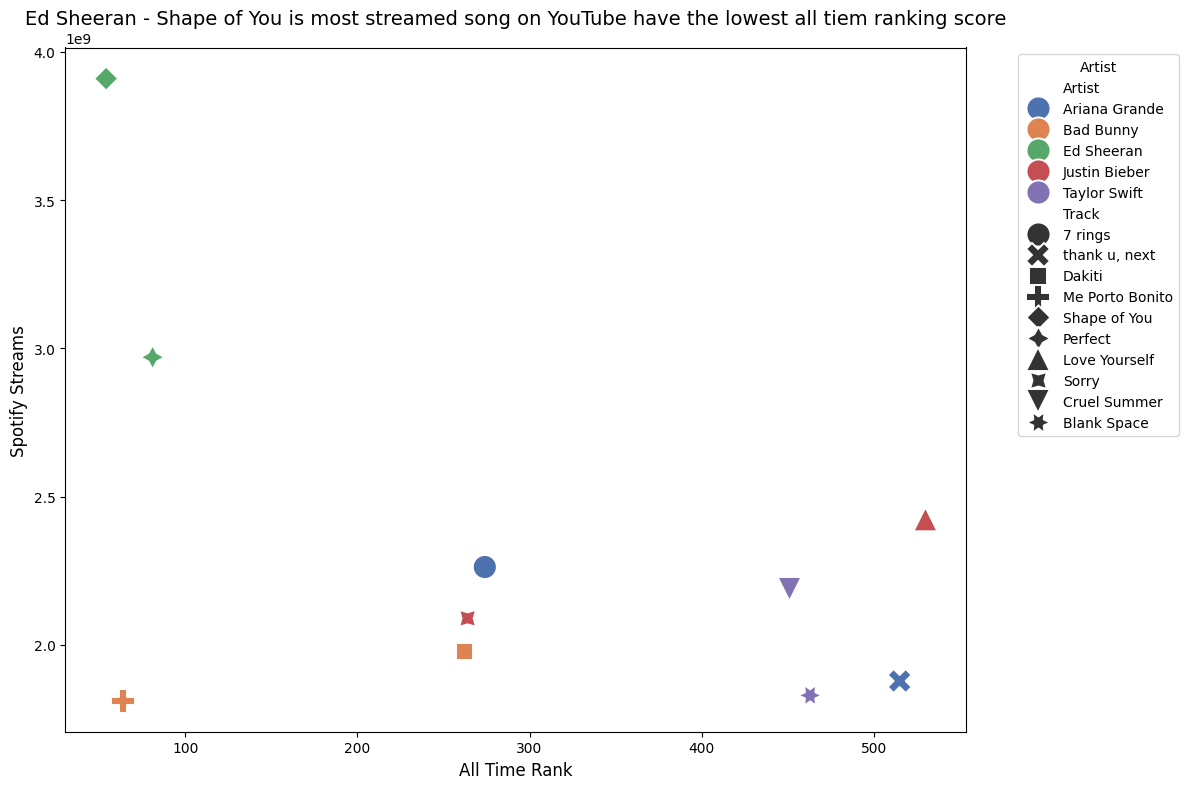

In [96]:
#Ranking Score vs Youtube Views
# Step 1: Filter the data for the top 5 artists
top_5_artists = ['Taylor Swift', 'Ariana Grande', 'Ed Sheeran', 'Bad Bunny', 'Justin Bieber']
df_top_5 = spotify_fields_keep[spotify_fields_keep['Artist'].isin(top_5_artists)]

# Step 2: Select the top 2 songs per artist based on Spotify Streams
df_top_5_top_songs = (
    df_top_5.groupby('Artist', group_keys=False)
    .apply(lambda x: x.nlargest(2, 'Spotify Streams'))
)

# Step 3: Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_5_top_songs, 
    x='All Time Rank', 
    y='Spotify Streams', 
    hue='Artist', 
    style='Track',  # Use Track Name to differentiate songs with markers
    palette='deep',
    s=300  # Set marker size
)

# Step 4: Set the title and axis labels
plt.title('Ed Sheeran - Shape of You is most streamed song on YouTube have the lowest all tiem ranking score', fontsize=14)
plt.xlabel('All Time Rank', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Step 5: Display the legend and plot
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

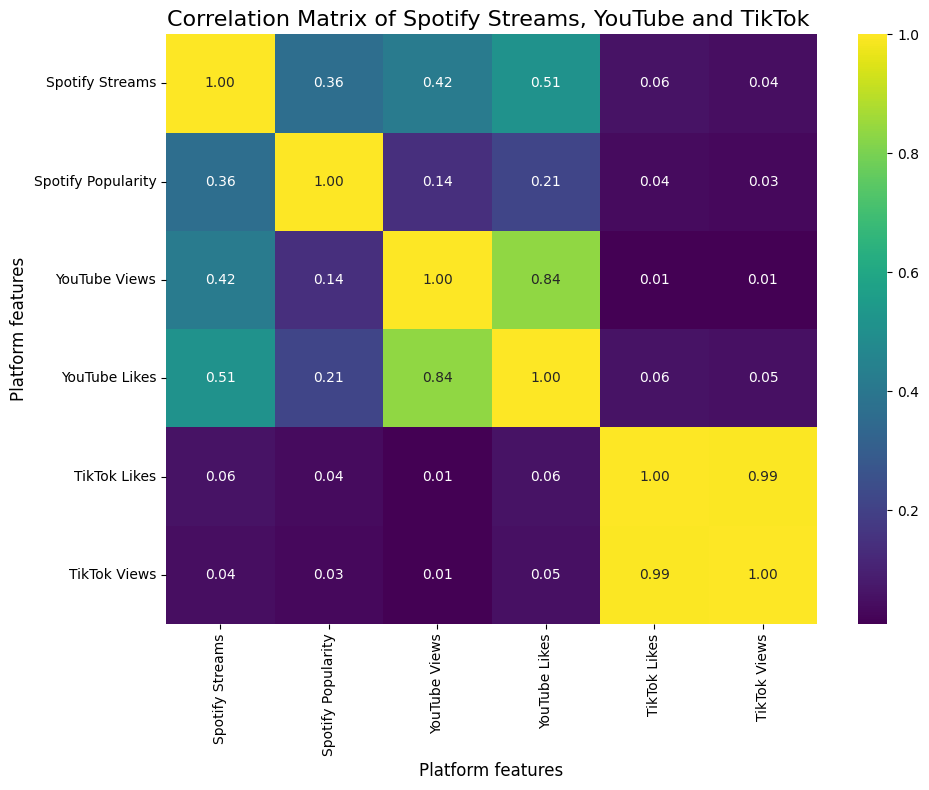

In [100]:
numeric_df = spotify_fields_keep.select_dtypes(include=[np.number])

# Remove specific columns from the DataFrame
columns_to_exclude = ['All Time Rank', 'Track Score', 'Explicit Track']
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')  # Use errors='ignore' to avoid issues if columns are missing


# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', cbar=True, xticklabels=corr.columns, yticklabels=corr.columns)

# Set plot title and axis labels
plt.title('Correlation Matrix of Spotify Streams, YouTube and TikTok ', fontsize=16)
plt.xlabel('Platform features', fontsize=12)
plt.ylabel('Platform features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date          ISRC All Time Rank  Track Score  \
0      Tommy Richman 

C:\Users\Karina\AppData\Local\Temp\ipykernel_8488\3830906815.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Season', y='Track Score', palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])


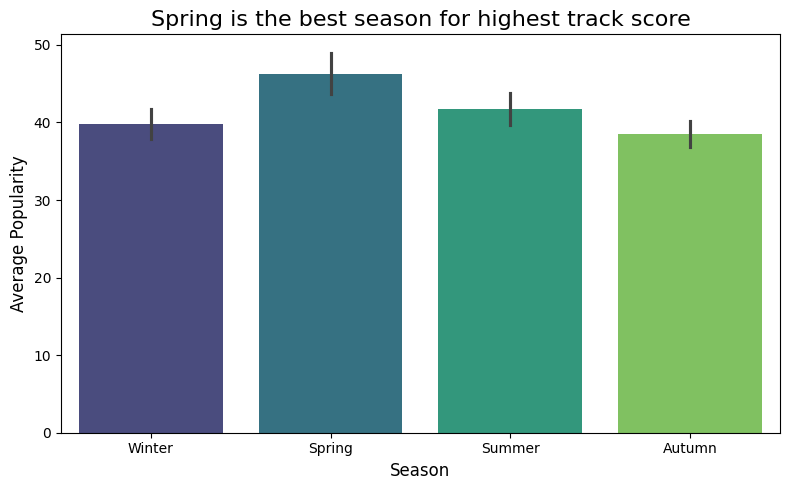

In [108]:
df = pd.DataFrame(spotify_2024)
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d/%m/%Y')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new column for season
#Individual seasons can be retrieved 
# from the dataset by calling the get_season() function, which returns an instance of a Season object.
df['Season'] = df['Release Date'].dt.month.map(get_season)

# Display the DataFrame
print(df)

# Example Visualization: Average popularity by season
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Season', y='Track Score', palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Spring is the best season for highest track score', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.tight_layout()
plt.show()